In [1]:
from supervised_utils import *

In [2]:
# funzione che plotta le distribuzioni delle colonne in input
def plot_dist(df, cols):
    fig, axes = plt.subplots(len(cols), 1, figsize=(8, 5 * len(cols)))

    for i, col in enumerate(cols):
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            sns.histplot(df[col], ax=axes[i], bins='auto')
        else:
            sns.countplot(df[col], ax=axes[i])

### Task di regressione su `score`

#### Addestramento e tuning sul dataset originale

In [3]:
df = pd.read_csv('../dataset/movies_v2.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'year', 'score', 'votes', 'budget', 'gross', 'runtime']

cols = {
    'target_col': 'score',
    'drop_cols': list(df.columns.difference(cols_to_retain)),
    'dummies_cols': ['genre', 'rating'],
    'labels_cols': [],
    'standardize_cols': ['runtime'],
    'log_standardize_cols': ['budget', 'gross', 'votes'],
    'minmax_standardize_cols': ['year']
}


Training and tuning [Linear Regression]...


Test score:
MSE: 0.4553925809139244
MAE: 0.49651003712308606

Training and tuning [Ridge Regression]...
Results after GridSearchCV:
Best parameters: {'alpha': 1}
Best score: {'mean_squared_error': 0.4483932125948826}


Test score:
MSE: 0.45426440387386324
MAE: 0.4956130374828647

Training and tuning [Decision Tree Regression]...
Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score: {'mean_squared_error': 0.5619428655077685}
Results after max_depth tuning:
Best parameters: {'max_depth': 7}
Best score: {'mean_squared_error': 0.5391607189748944}


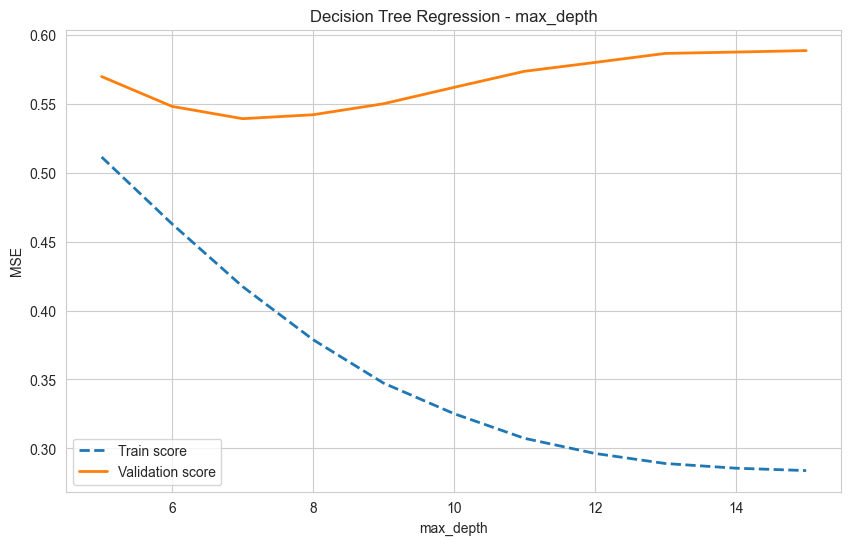



Test score:
MSE: 0.5304924942971201
MAE: 0.5348558567147722

Training and tuning [Random Forest Regression]...
Results after GridSearchCV:
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score: {'mean_squared_error': 0.41944947037047386}
Results after max_depth tuning:
Best parameters: {'max_depth': 16}
Best score: {'mean_squared_error': 0.4203374952868642}


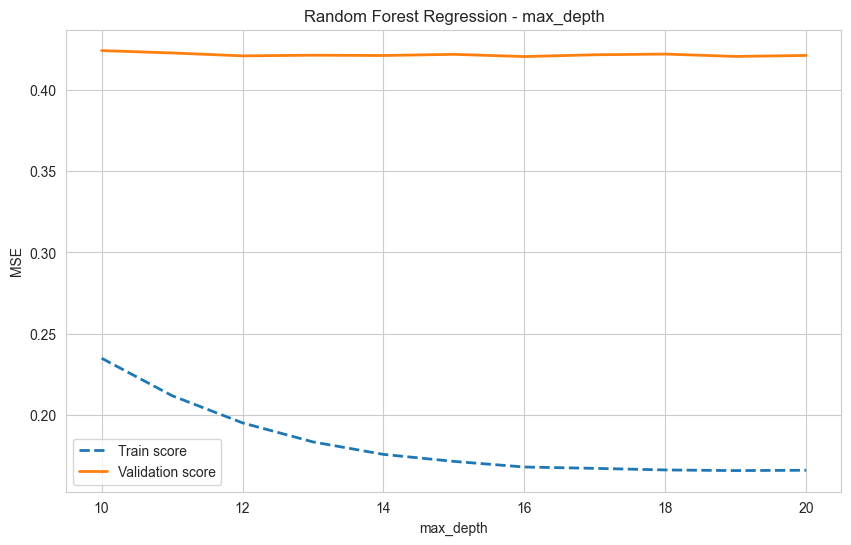

Results after n_estimators tuning:
Best parameters: {'n_estimators': 330}
Best score: {'mean_squared_error': 0.4202572582179654}


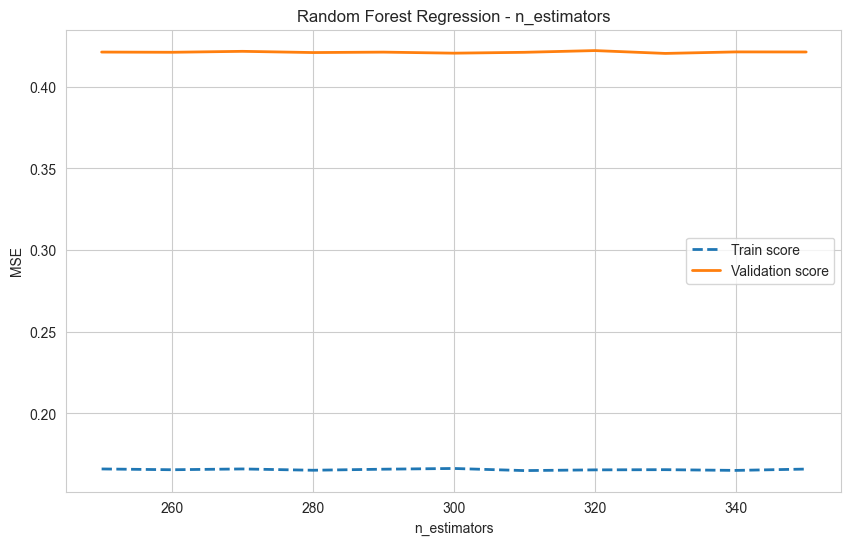



Test score:
MSE: 0.39414618673494245
MAE: 0.4604692141357352

Training and tuning [Gradient Boosting Regression]...


In [5]:
# tuning e testing dei modelli
tune_and_test_models_for_regression(df, cols, cv=5)

In [60]:
# addestramento e tuning della LinearRegression

model = LinearRegression()

params = {
    'fit_intercept': [True, False]
}

best_model = tune_model(model, 'LinearRegression', X_train, y_train, cv=5,
                        grid_params=params, grid_metrics=['neg_mean_squared_error'], verbose=True)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f'\nTest score: {mean_squared_error(y_test, y_pred)}')

Results for [LinearRegression] after GridSearchCV:
Best parameters: {'fit_intercept': True}
Best score: {'neg_mean_squared_error': -0.4488150656854959}

Test score: 0.4553925809139244


Results for [DecisionTreeRegressor] after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: {'neg_mean_squared_error': -0.6592843568767419}
Results for [DecisionTreeRegressor] after max_depth tuning:
Best parameters: {'max_depth': 19}
Best score: {'neg_mean_squared_error': 0.6583923569971989}


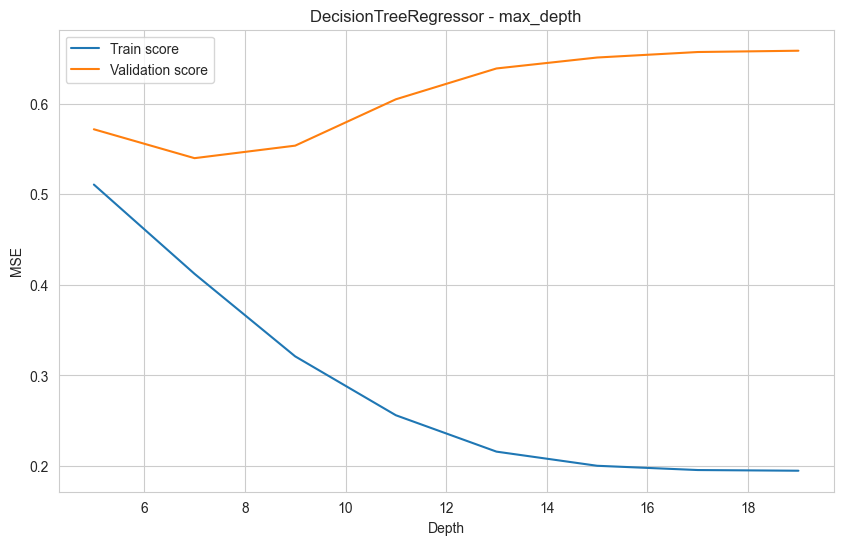


Test score: 0.6018259574576358


In [61]:
# addestramento e tuning del DecisionTreeRegressor

model = DecisionTreeRegressor() 

params = {
    'criterion': ['squared_error', 'friedman_mse'], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

best_model = tune_model(model, 'DecisionTreeRegressor', X_train, y_train, cv=5,
                        grid_params=params, grid_metrics=['neg_mean_squared_error'],
                        cv_params={'max_depth': [d for d in range(5, 20, 2)]}, cv_metric='neg_mean_squared_error', verbose=True, plot=True,
                        xlabel='Depth', ylabel='MSE')

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f'\nTest score: {mean_squared_error(y_test, y_pred)}')

Results for [RandomForestRegressor] after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: {'neg_mean_squared_error': -0.4219836835338969}
Results for [RandomForestRegressor] after max_depth tuning:
Best parameters: {'max_depth': 5}
Best score: {'neg_mean_squared_error': 0.49935575172291546}


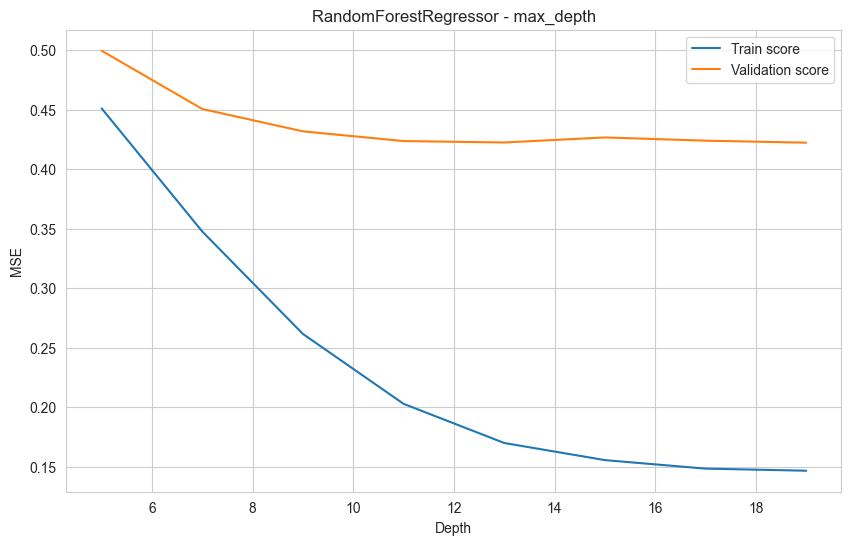

Results for [RandomForestRegressor] after n_estimators tuning:
Best parameters: {'n_estimators': 10}
Best score: {'neg_mean_squared_error': 0.4488883718161046}


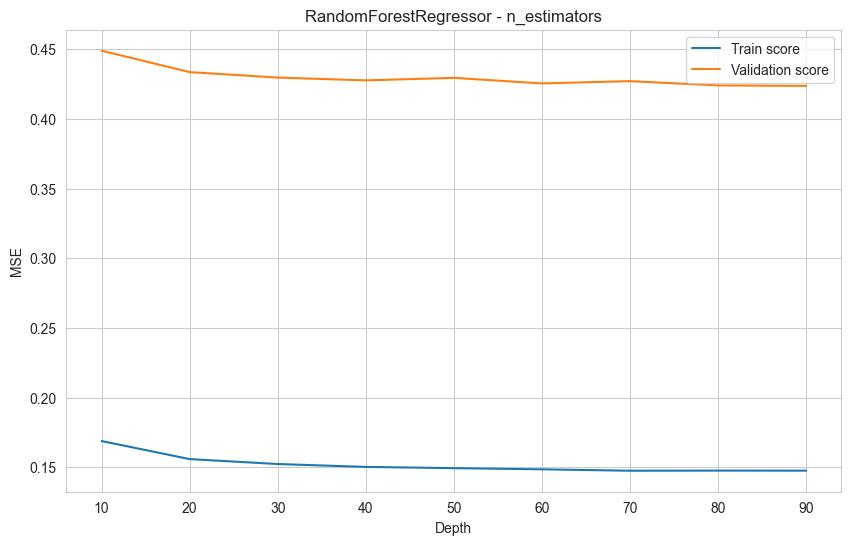


Test score: 0.39336696299631035


In [62]:
# addestramento e tuning del RandomForestRegressor

model = RandomForestRegressor() 

params = {
    'criterion': ['squared_error', 'friedman_mse'], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

best_model = tune_model(model, 'RandomForestRegressor', X_train, y_train, cv=5,
                        grid_params=params, grid_metrics=['neg_mean_squared_error'],
                        cv_params={'max_depth': [d for d in range(5, 20, 2)], 
                                   'n_estimators': [d for d in range(10, 100, 10)]}, 
                        cv_metric='neg_mean_squared_error', verbose=True, plot=True,
                        xlabel='Depth', ylabel='MSE')

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f'\nTest score: {mean_squared_error(y_test, y_pred)}')

C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    vali

Results for [GradientBoostingRegressor] after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'loss': 'squared_error', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: {'neg_mean_squared_error': -0.41580626524106334}
Results for [GradientBoostingRegressor] after max_depth tuning:
Best parameters: {'max_depth': 19}
Best score: {'neg_mean_squared_error': 0.5674805791197037}


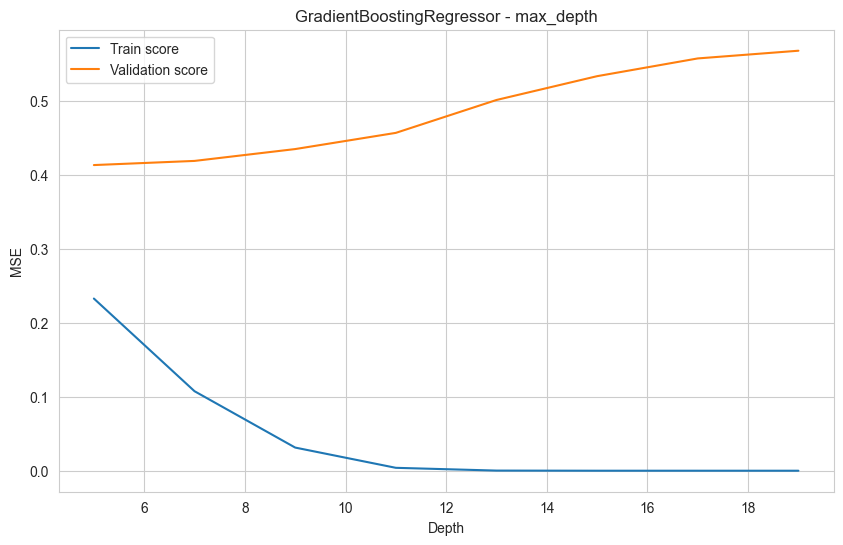

Results for [GradientBoostingRegressor] after n_estimators tuning:
Best parameters: {'n_estimators': 60}
Best score: {'neg_mean_squared_error': 0.5676937608217781}


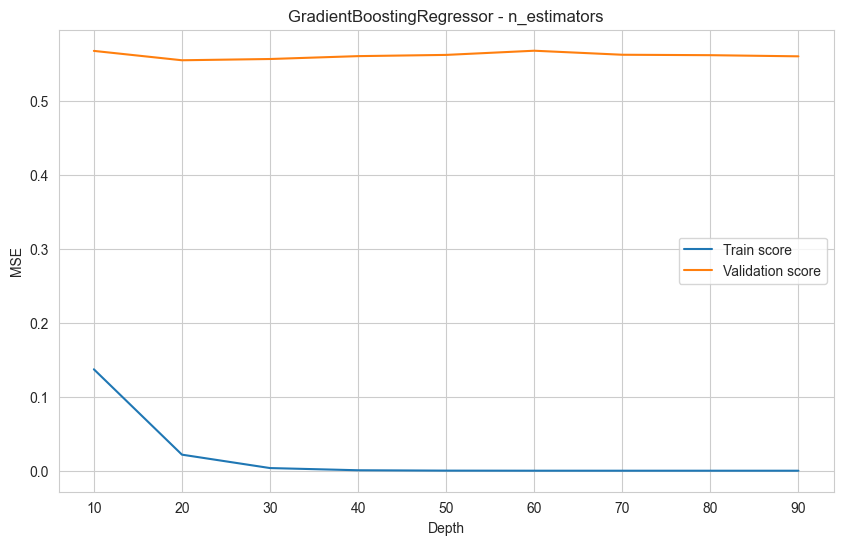


Test score: 0.5098516254742462


In [64]:
# addestramento e tuning del GradientBoostingRegressor

model = GradientBoostingRegressor()

params = {
    'loss': ['squared_error', 'friedman_mse'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.1, 0.5, 1.0]
}

best_model = tune_model(model, 'GradientBoostingRegressor', X_train, y_train, cv=5,
                        grid_params=params, grid_metrics=['neg_mean_squared_error'],
                        cv_params={'max_depth': [d for d in range(5, 20, 2)],
                                   'n_estimators': [d for d in range(10, 100, 10)]},
                        cv_metric='neg_mean_squared_error', verbose=True, plot=True,
                        xlabel='Depth', ylabel='MSE')

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f'\nTest score: {mean_squared_error(y_test, y_pred)}')

#### Addestramento e tuning sul primo dataset derivato

In [8]:
df = pd.read_csv('../dataset/movies_final_v1.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'age', 'score', 'runtime', 'profit_index', 'success_index', 'director_num_movies', 'actor_num_movies',
                  'director_score_mean', 'director_score_std', 'actor_score_mean', 'actor_score_std',
                  'director_profit_mean', 'director_profit_std', 'actor_profit_mean', 'actor_profit_std']

In [9]:
# preparazione del dataset per l'addestramento

X_train, X_test, y_train, y_test = prepare_data(df, target_col='score', 
                                                   drop_cols=list(df.columns.difference(cols_to_retain)),
                                                   dummies_cols=['genre', 'rating'],
                                                   standardize_cols=['runtime', 'profit_index', 'success_index'],
                                                   log_standardize_cols=[],
                                                   minmax_standardize_cols=['age', 'director_num_movies', 'actor_num_movies'])

In [10]:
# addestramento e tuning della LinearRegression

model = LinearRegression()

params = {
    'fit_intercept': [True, False]
}

best_model = tune_model(model, 'LinearRegression', X_train, y_train, cv=5,
                        grid_params=params, grid_metrics=['neg_mean_squared_error'],
                        verbose=True)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f'\nTest score: {mean_squared_error(y_test, y_pred)}')

Results for [LinearRegression] after GridSearchCV:
Best parameters: {'fit_intercept': True}
Best score: {'neg_mean_squared_error': -2.785778398955011}

Test score: 0.4079668252549563


Results for [DecisionTreeRegressor] after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: {'neg_mean_squared_error': -0.32613026279960644}
Results for [DecisionTreeRegressor] after max_depth tuning:
Best parameters: {'max_depth': 19}
Best score: {'neg_mean_squared_error': 0.32674872003322464}


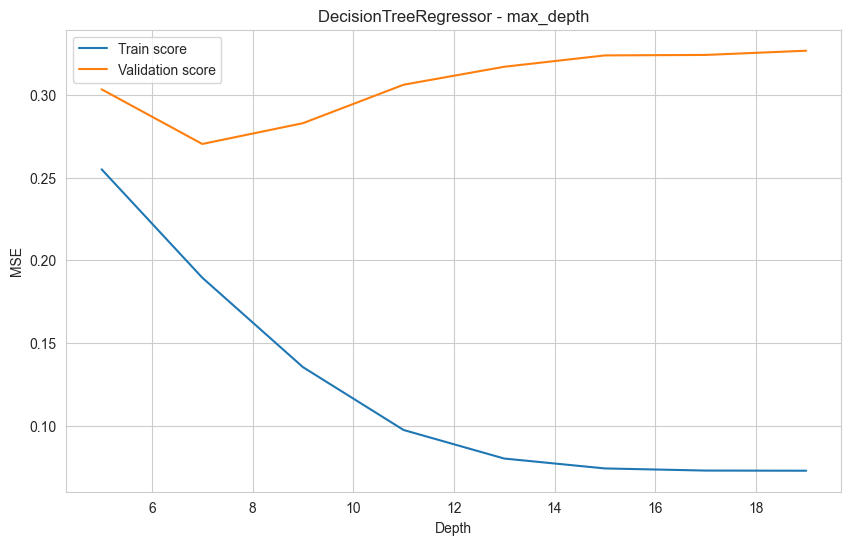


Test score: 0.30863254985705174


In [11]:
# addestramento e tuning del DecisionTreeRegressor

model = DecisionTreeRegressor()

params = {
    'criterion': ['squared_error', 'friedman_mse'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

best_model = tune_model(model, 'DecisionTreeRegressor', X_train, y_train, cv=5,
                        grid_params=params, grid_metrics=['neg_mean_squared_error'],
                        cv_params={'max_depth': [d for d in range(5, 20, 2)]}, cv_metric='neg_mean_squared_error', verbose=True, plot=True,
                        xlabel='Depth', ylabel='MSE')

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f'\nTest score: {mean_squared_error(y_test, y_pred)}')

Results for [RandomForestRegressor] after GridSearchCV:
Best parameters: {'criterion': 'friedman_mse', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: {'neg_mean_squared_error': -0.20021878561069348}
Results for [RandomForestRegressor] after max_depth tuning:
Best parameters: {'max_depth': 5}
Best score: {'neg_mean_squared_error': 0.25058871689631024}


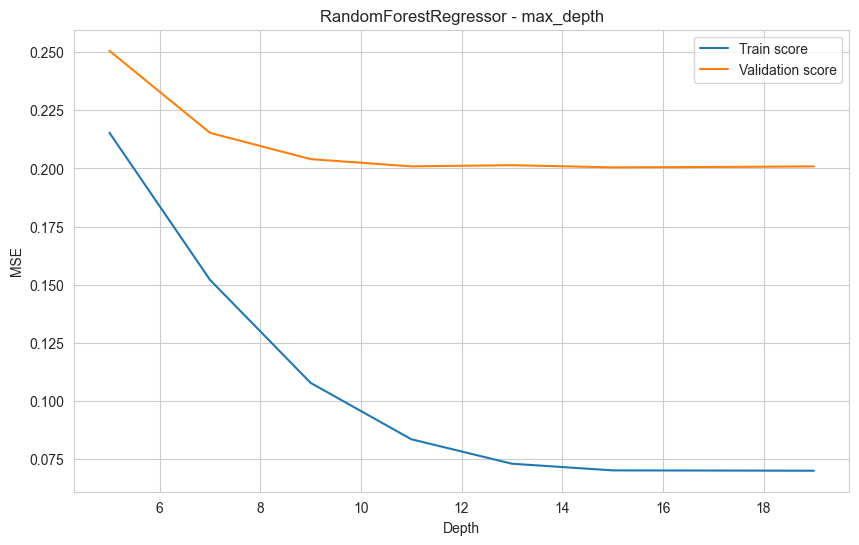

Results for [RandomForestRegressor] after n_estimators tuning:
Best parameters: {'n_estimators': 10}
Best score: {'neg_mean_squared_error': 0.21334493454659262}


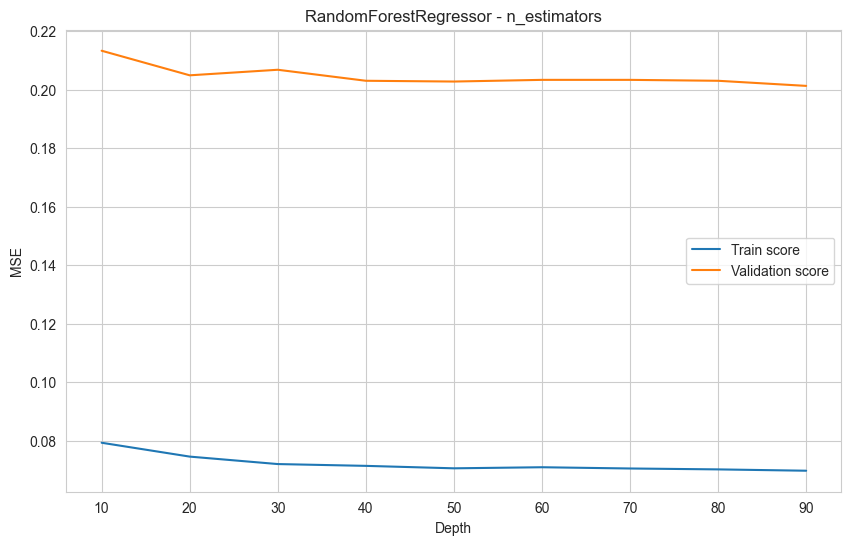


Test score: 0.19076639198413503


In [12]:
# addestramento e tuning del RandomForestRegressor

model = RandomForestRegressor()

params = {
    'criterion': ['squared_error', 'friedman_mse'], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

best_model = tune_model(model, 'RandomForestRegressor', X_train, y_train, cv=5,
                        grid_params=params, grid_metrics=['neg_mean_squared_error'],
                        cv_params={'max_depth': [d for d in range(5, 20, 2)], 
                                   'n_estimators': [d for d in range(10, 100, 10)]}, 
                        cv_metric='neg_mean_squared_error', verbose=True, plot=True,
                        xlabel='Depth', ylabel='MSE')

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f'\nTest score: {mean_squared_error(y_test, y_pred)}')

Results for [GradientBoostingRegressor] after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'loss': 'huber', 'min_samples_leaf': 4, 'min_samples_split': 5}
Best score: {'neg_mean_squared_error': -0.20358862262734617}
Results for [GradientBoostingRegressor] after max_depth tuning:
Best parameters: {'max_depth': 19}
Best score: {'neg_mean_squared_error': 0.22760377146313338}


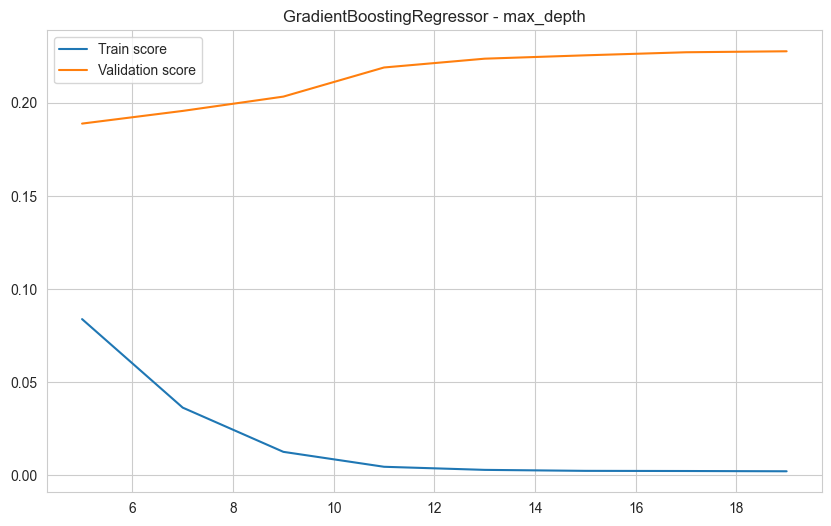

Results for [GradientBoostingRegressor] after n_estimators tuning:
Best parameters: {'n_estimators': 10}
Best score: {'neg_mean_squared_error': 0.32640855833450316}


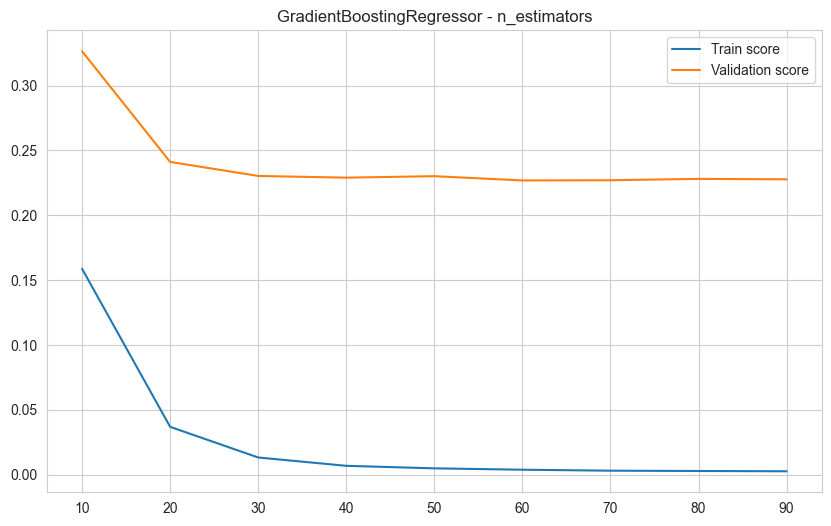


Test score: 0.20683788799711464


In [13]:
# addestramento e tuning del GradientBoostingRegressor

model = GradientBoostingRegressor()

params = {
    'loss': ['squared_error', 'huber'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.1, 0.5, 1.0]
}

best_model = tune_model(model, 'GradientBoostingRegressor', X_train, y_train, cv=5,
                        grid_params=params, grid_metrics=['neg_mean_squared_error'],
                        cv_params={'max_depth': [d for d in range(5, 20, 2)],
                                   'n_estimators': [d for d in range(10, 100, 10)]},
                        cv_metric='neg_mean_squared_error', plot=True,
                        verbose=True)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f'\nTest score: {mean_squared_error(y_test, y_pred)}')